# DrivenData - Genetic Engineering Attribution Challenge

#### 01-05-2021, additional verification
+ tried Baysian Gaussian Mixture for categorizing and additional feature creation. (not effective. may have to create at least 1314 categories to make it work?)
+ trained robust scaler only on training data, not for both as previously.
+ removed header and footer features since it has not provide major contribution.
+ model architecture:
    + tried no hidden layers for keras. less time for each epoch but not as effective. take more than 30 epoch to reach 86% and seems it stoped at 88.8% (after 92 epoch)
    + 3 layers structure is working for now.
    + 4 layers takes longer to train and less effective.

#### 01-04-2021, additional tryings
+ tried to split the headers into cateogorical columns, not effective and takes a great deal of time running
+ found out missed out header and footer while running yesterday. added back in and result is as previous, between 89 ~ 91%

#### 01-03-2021, additional improvement
+ Oversampling with RandomResampling and SMOTE
+ test undersampling (not successful)
+ implement the ability to show iterative progress of function
+ impute N in the DNA sequence (for now, ignore N in the DNA sequence completely.)
    - Idea 1 during the n-gram feature generation phase, add the N related feature occurance

#### 01-02-2021, Neuron network implemented
+ tested saving test data. not a great idea.
+ save for neuron network model.
+ header feature changed
+ added feature for sequence length logic

#### 12-19-2020, Group Hackthon collaborated efforts with RFC, Native Bayes,
+ RBF and Neuron Network In progress (session 420 and 430)

#### 12-10-2020, Vanessa added dataset links 

#### 12-07-2020, Jim set up Benchmark

#### future work
+ implement the ability to auto generate and eliminate features
+ figure out how to premutate more than 5 n-gram (maybe write one by myself?)
+ output spec evaluation
+ maybe generate a combined feature based from header and length of the sequence?

#### drop

+ implement test out RBF. (tried, not working, require way to much of memory for the data after the imputation.
    - use guassian process for RBF?
+ undersampling try Wilson's Editing approach (failed)

In [26]:
### Import Libraries

from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set()

print("Libraries Loaded")

Libraries Loaded


In [27]:
### Auxiliary libraries

import winsound as alarm 
import time

### Auxiliary parameter setup

duration = 1500  # milliseconds
freq = 440  # Hz

## 100 Read Data

In [28]:
### Following code for reading off of JMO Harddrive

#DATA_DIR = 'C:/Users/jorrison/Documents/Home/Harvard/DataMinds/Genetic Engineering/Data/'

#train_values = pd.read_csv(DATA_DIR + 'train_values.csv', index_col='sequence_id')
#train_labels = pd.read_csv(DATA_DIR + 'train_labels.csv', index_col='sequence_id')
#test_values  = pd.read_csv(DATA_DIR + 'test_values.csv' , index_col='sequence_id')

#train_values.head()

In [29]:
### Read local by roland

train_labels = pd.read_csv('train_labels.csv', index_col='sequence_id')
train_values = pd.read_csv('train_values.csv', index_col='sequence_id')

In [30]:
### remote read

#train_values = pd.read_csv('https://www.dropbox.com/s/3atnfvr65oh0y4y/train_values.csv?dl=1', index_col='sequence_id')
#train_labels = pd.read_csv('https://www.dropbox.com/s/71yg5f3dbc4h2yd/train_labels.csv?dl=1', index_col='sequence_id')
#test_values  = pd.read_csv('https://www.dropbox.com/s/4g1astwaccer5lz/test_values.csv?dl=1' , index_col='sequence_id')

# train_values.head()

### 110 Explore the Training Data

train_values.dtypes

### 120 remove the lab has the highest frequency occurance in dataset.

largelab_rownum = train_labels[ train_labels['I7FXTVDP'] > 0 ].index

largelab_rownum.shape

largelab_rownum

train_labels_dropped = train_labels.drop(largelab_rownum)

train_values_dropped = train_values.drop(largelab_rownum)

train_labels_dropped.shape

train_values_dropped.shape

### 130 reduce the output labels dimension to string label text.

#lab_ids = pd.DataFrame(train_labels.idxmax(axis=1), columns = ['lab_id'])

lab_ids = pd.DataFrame(train_labels_dropped.idxmax(axis=1), columns = ['lab_id'])

In [31]:
sequence_lengths = train_values.sequence.apply(len)

sequence_lengths.describe()

count    63017.000000
mean      4839.025501
std       3883.148431
min         20.000000
25%        909.000000
50%       4741.000000
75%       7490.000000
max      60099.000000
Name: sequence, dtype: float64

### 140 visualize number of sequence code with length of 2500 or less.
sequence_lengths.plot(kind='hist',
                     title= 'Distribution of DNA Sequence Length', 
                     bins = 2500,
                     xlim = (0, 2500))   # Suppress a bar longer than 20,000

### 150 visualize number of genetic sequence code with length of 1700 or less
sequence_lengths[sequence_lengths<1700].plot(kind='hist',
                     title= 'Distribution of DNA Sequence Length', 
                     bins = 100)

### 160 extrapolate data with genetic sequence length 1700 or less

index_ferdous = sequence_lengths[sequence_lengths<1700].index

df_ferdous_values = train_values_dropped.loc[index_ferdous]

### 170 visualize the value occurance of other 39 features contained in training values.

sorted_binary_features = train_values.iloc[:, 1:].mean().sort_values()

ax = sorted_binary_features.plot(kind = 'barh',
                                stacked = True,
                                figsize = (5,12),
                                title   = 'Prevalence of Binary Features')
ax.set_xlabel('Proportion of sequences')

### 175 inspect the output lab occurrance

train_labels.sum().describe()

### 180 Explore the Test Data

skipped, since we can't check the test data result

### 190 Explore Training Labels

train_labels.head()

In [32]:
# Get the column with the max value in each row

lab_ids = pd.DataFrame(train_labels.idxmax(axis=1), columns = ['lab_id'])

In [33]:
##### Get the distribution of lab prevalence in the training set
lab_ids['lab_id'].value_counts().describe()

count    1314.000000
mean       47.958143
std       262.552258
min         1.000000
25%         9.000000
50%        15.000000
75%        34.000000
max      8286.000000
Name: lab_id, dtype: float64

In [34]:
#### Sort lab ids by prevalence
(lab_ids['lab_id'].value_counts(normalize = True).sort_values(ascending=False)).head()

I7FXTVDP    0.131488
RKJHZGDQ    0.043353
GTVTUGVY    0.042401
A18S09P2    0.016884
Q2K8NHZY    0.015440
Name: lab_id, dtype: float64

### 200 Enrich Data Sets

In [35]:
from itertools import permutations

#### 210 Construct Features from DNA Sequences

#### 211 create bases from DNA Sequences. (got lazy so I just put bases as values.

#### 5 element bases
bases = set(''.join(train_values.sequence.values))

bases5 ={'A', 'C', 'G', 'N', 'T'}
bases5

In [36]:
# 4 element bases

bases4 ={'A', 'C', 'G', 'T'}
bases4

{'A', 'C', 'G', 'T'}

#### 212 Reduced Permutation to test out the effect. seems the 2-gram approach is not as good as 4 grams
n = 2
subsequences = [''.join(permutation) for permutation in permutations(bases, r=n)]
print(f"Number of subsequences: {len(subsequences)}")
subsequences[:10]

#### 212 Example of built-in count method on strings
Because it's non-overlapping, "atta" is only counted twice
"gattattattaca".count("atta")

#### 212 Counting the Subsequences

In [37]:
# Calculate 4 base features on our training set (ferdous training set)
features_4b = get_nbase_features(train_values, bases4)

alarm.Beep(freq,duration)

1  gram variation count:  4
2  gram variation count:  12
3  gram variation count:  24
4  gram variation count:  24
n gram permutation time:  0.00022859999999980118
 |██████████████████████████████████████████████████| 100.0% 


+ Calculate 5 base features on our training set (ferdous training set)
+ currently not as effective as bases4

features_5b = get_nbase_features(train_values, bases5)

#### 221 Header and Footer ordinate and binary

In [147]:
#### 221 Right footer amino stop sequence extraction function

rightAMINO=lambda x: x[-3:]

#### 222 Left header 5 prime UTR extraction

fivePUTR=lambda x: x[0:15]

#### 223 extract both footer and header for value validation and evaluation

footer = train_values.sequence.apply(rightAMINO)
header = train_values.sequence.apply(fivePUTR)

#### 225 use label encoder to transfer all the categorical variables
####     into numerical variables

from sklearn.preprocessing import LabelEncoder

headerEnc = LabelEncoder()
header_code = headerEnc.fit_transform(header)
#all_features["header"]=pd.Series(header_code,index = train_values.index)

footerEnc = LabelEncoder()
footer_code = footerEnc.fit_transform(footer)
#all_features["footer"]=pd.Series(footer_code,index = train_values.index)

In [148]:
header_bin = ordin2Bin(pd.Series(header_code,index = train_values.index),"header")
footer_bin = ordin2Bin(pd.Series(footer_code,index = train_values.index),"footer")

#### 230 add binary feature for sequence length below 1750 and above 1750

In [149]:
bins = [0,1750,np.inf]
labels = [0,1]

len_bin = pd.cut(sequence_lengths,bins=bins,labels=labels)
len_bin.columns = "length seperation"

#### 240 all features combined.

In [150]:
all_features=train_values.drop("sequence",axis=1).join([len_bin,features_4b])


### 300 Split and scale

#### 310 Break apart Training Data Set into Train-Validate-Test

In [151]:
from sklearn.model_selection import train_test_split

#### 311 split the data into training and validation sets. for multiple columns binary output split.

X,X_validate,y_lab,y_lab_validate = randomSplit_lab(all_features,lab_ids,TEST_SIZE=0.2)

In [152]:
X,X_validate,y_cat,y_cat_validate = train_test_split(all_features,train_labels,test_size=0.2)

#### 312 save the split into files so we don't have to split the file but just load the files.

start = time.perf_counter()

X_bin.to_csv("X_bin-2021-01-02.csv")
X_bin_validate.to_csv("X_bin_validate-2021-01-02.csv")
y_bin.to_csv("y_bin-2021-01-02.csv")
y_bin_validate.to_csv("y_bin_validate-2021-01-02.csv")
end   = time.perf_counter()

print(end-start)

#### 320 Oversampling minorities.

from imblearn.over_sampling import SMOTE, BorderlineSMOTE, KMeansSMOTE,ADASYN
from imblearn.over_sampling import RandomOverSampler
import math

#### 321 Random over sampling

y_lab_counts = pd.DataFrame(y_lab.value_counts(),columns=["n_train"])
y_lab_counts["n_adjusted"] = (y_lab_counts["n_train"].apply(math.log)+1)*7
y_lab_counts["n_max"]=y_lab_counts.max(axis=1)

df_sampling = y_lab_counts["n_max"].astype("int32")
try:
    index = [i[0] for i in list(df_sampling.keys())]
    values = list(df_sampling.values)
    
    sampling_strategy = pd.Series(values,index = index).to_dict()
except:
    sampling_strategy = y_lab_counts["n_max"].astype("int32").to_dict()


#sampling_strategy = sampling_strategy.to_dict()

if "df_top10_categorical" in __name__:
    print("yes")
else:
    print("no")
    #sampling_strategy = (2-(df_top10_categorical+1))*sampling_stragegy

#### confusion matrix

sampler = RandomOverSampler(sampling_strategy= sampling_strategy)

X_R_res,y_R_lab_res = sampler.fit_resample(X,y_lab)

#### 322 SMOTE over sampling

sm = SMOTE(sampling_strategy='minority',n_jobs = 4)
X_res,y_lab_res=sm.fit_resample(X_R_res,y_R_lab_res)

alarm.Beep(freq,duration)

#### 330 undersampling attempts with (apparently only if I include not minority, there will be undersampling and it resulted a few lab samples were remove from the records.)

+ NeighbourhoodCleaningRule
+ AllKNN
+ EditedNearestNeighbours

#### 331 NeighbourhoodCleaningRule

from imblearn.under_sampling import NeighbourhoodCleaningRule

ncr = NeighbourhoodCleaningRule(sampling_strategy="majority",n_jobs=4)
X_resampled, y_resampled = ncr.fit_resample(X_res.to_numpy(), y_cat_res.to_numpy())

alarm.Beep(freq,duration)

#### 332 EditedNearestNeighbours

from imblearn.under_sampling import EditedNearestNeighbours

ENN = EditedNearestNeighbours(n_jobs=4)
X_resampled, y_resampled = ENN.fit_resample(X_res.to_numpy(), y_cat_res.to_numpy())

alarm.Beep(freq,duration)

#### 340 Create Baysian Gaussian Mixture features

X_res,BGM = BGMfeatureGen(X_res)

#### 380 scale all the features across the columns

In [153]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

default_scaler = RobustScaler(with_centering=False)
#default_scaler = MinMaxScaler()
default_scaler.fit(X)
X_scaled = pd.DataFrame(default_scaler.transform(X),columns = X.columns,index = X.index)
X_scaled_validate = pd.DataFrame(default_scaler.transform(X_validate),columns = X_validate.columns,index = X_validate.index)

#### 390 create categorical output set for neuron network to train on

y_cat_res = pd.get_dummies(y_lab_res)
y_cat_validate = pd.get_dummies(y_lab_validate)

#### 391 a quick validation to check both the train and validate have covered
the whole spectrum of the output lab labels. for categorical output only


In [154]:
print('No of records in training set: ',y_cat.shape[0])
print('No of records in validate set: ',y_cat_validate.shape[0])

print('Labs have 0 record in training set: '+str(y_cat.sum()[y_cat.sum()==0]))
print('Labs have 0 record in validate set: '+str(y_cat_validate.sum()[y_cat_validate.sum()==0]))

No of records in training set:  50413
No of records in validate set:  12604
Labs have 0 record in training set: Series([], dtype: float64)
Labs have 0 record in validate set: 03GRNN7N    0.0
0L3Y6ZB2    0.0
13LZE1F7    0.0
1EDZ6CA7    0.0
1KZHNVYR    0.0
           ... 
XU8GASLQ    0.0
Y5YH740Y    0.0
YY5Y32CI    0.0
Z8BWVZZX    0.0
ZB6DPIG5    0.0
Length: 119, dtype: float64


### 400 ML Model


In [155]:
from sklearn.model_selection import GridSearchCV
featureLS = list(X_scaled.columns)

#### 410 Random Forest (functional)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators =400,
                            class_weight="balanced",
                            max_depth =10,
                            bootstrap =False,
                            n_jobs = 5)


#### fit our model
start = time.perf_counter()
rf.fit(X_res,y_lab_res)
end   = time.perf_counter()

print(end-start)

#### validation evaluation

start = time.perf_counter()

df_rf_predict= rf.predict(X_validate)
top10_result=top10_accuracy_label(rf, X_validate, y_lab_validate.to_numpy())

end   = time.perf_counter()

print("Top 10 value accuracy:"+str(top10_result))
print("Top 10 value process time:"+str(end-start))

#### just a note

+ changing the estimator number to 400 improved the result significantly
+ increase the depth to 10 improved the result.
+ scaling the features improve the result by 4%

#### 420 Keras neuro-network (not functional yet, use with caution.)

In [156]:
from keras.models import Sequential,load_model
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
from keras.metrics import BinaryAccuracy
from keras.metrics import top_k_categorical_accuracy
import functools

#### 421 Load previously saved Neuron Network

keras_nn = load_model("3l_nnet_2021-01-05-1300.nn")

#### 422 top 10 categorical accuracy metrics function

In [157]:
top10_acc = functools.partial(top_k_categorical_accuracy, k=10)
top10_acc.__name__ = 'top10_acc'


In [1]:
input_dim = scaled.shape[1]
output_dim = y_cat.shape[1]

nnet = Sequential()
nnet.add(Dense(input_dim+1,activation = "tanh",input_dim =input_dim))
nnet.add(Dense(output_dim+1, activation='relu'))
nnet.add(Dense(output_dim, activation='softmax'))
# Compile model

NameError: name 'X_scaled' is not defined

#### 422 use weighted categorical crossentropy loss function

weights = df_top10_weight

mohammed.compile(loss=weighted_categorical_crossentropy(weights), 
                 optimizer='adam',
                 metrics=[top10_acc])

In [159]:
nnet.compile(loss="categorical_crossentropy", 
                 optimizer='adam',
                 metrics=[top10_acc])

In [160]:
train_history = nnet.fit(X_scaled,y_cat,epochs=7)
alarm.Beep(freq, duration)

Epoch 1/7
1576/1576 [==============================] - 30s 19ms/step - loss: 3.2245 - top10_acc: 0.6841
Epoch 2/7
1576/1576 [==============================] - 30s 19ms/step - loss: 1.8822 - top10_acc: 0.8541
Epoch 3/7
1576/1576 [==============================] - 30s 19ms/step - loss: 1.4761 - top10_acc: 0.9016 2s - loss - ETA: 0s - loss: 1.4765 - top10
Epoch 4/7
1576/1576 [==============================] - 31s 20ms/step - loss: 1.2122 - top10_acc: 0.9317
Epoch 5/7
1576/1576 [==============================] - 32s 20ms/step - loss: 1.0128 - top10_acc: 0.9532 0s - loss: 1.0131 - top10_acc: 0.953
Epoch 6/7
1576/1576 [==============================] - 31s 20ms/step - loss: 0.8569 - top10_acc: 0.9675
Epoch 7/7
1576/1576 [==============================] - 32s 20ms/step - loss: 0.7378 - top10_acc: 0.9773


trainning parameters:  {'verbose': 1, 'epochs': 7, 'steps': 1576}


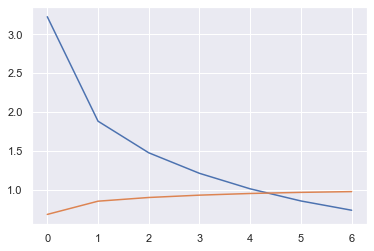

In [161]:
print("trainning parameters: ",train_history.params)
plt.plot(train_history.history["loss"])
plt.plot(train_history.history["top10_acc"])

X_validate_t,BGM = BGMfeatureGen(X=X_validate,BGM=BGM)

In [162]:
start = time.perf_counter()
nnet_predict = nnet.predict(X_scaled_validate)
df_nnet_predict = pd.DataFrame(nnet_predict,index = y_cat_validate.index,columns = y_cat.columns)

df_top1_validation  = top1_accuracy_cat(df_nnet_predict,y_cat_validate)
df_top10_validation = top10_accuracy_cat(df_nnet_predict,y_cat_validate)

end   = time.perf_counter()

print("Evaluation process time: ",end-start)

Top 1 Validation Accuracy:  0.699857188194224
Top 10 Validation Accuracy:  0.9064582672167566
Evaluation process time:  3.8446800999954576


----top 1 categorical result----


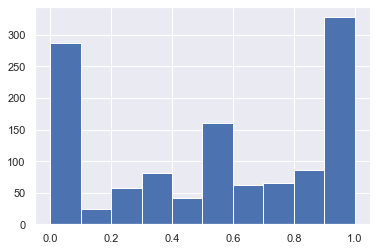

categorical accuracy:  count    1195.000000
mean        0.531983
std         0.383486
min         0.000000
25%         0.142857
50%         0.500000
75%         0.953835
max         1.000000
dtype: float64
----top 10 categorical result----


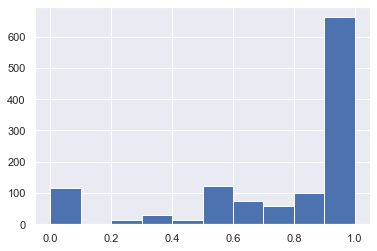

categorical accuracy:  count    1195.000000
mean        0.768064
std         0.322588
min         0.000000
25%         0.600000
50%         0.981132
75%         1.000000
max         1.000000
dtype: float64


In [163]:
print("----top 1 categorical result----")
df_top1_categorical,df_top1_weight= categoricalAccuracy(df_top1_validation,y_cat_validate)

print("----top 10 categorical result----")
df_top10_categorical,df_top10_weight = categoricalAccuracy(df_top10_validation,y_cat_validate)

In [448]:
#### 429 Save neuron networks

nnet.save("3l_nnet_2021-01-05-1800")

INFO:tensorflow:Assets written to: 3l_nnet_2021-01-05-1800\assets


<AxesSubplot:>

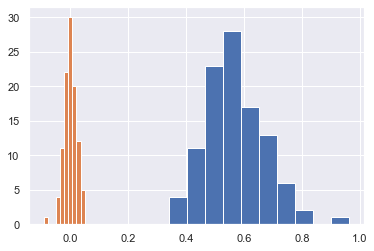

In [449]:
#### 428 first layer neurons weight result check.
df_feature_weight = pd.DataFrame(nnet.get_weights()[0],index = X.columns)

df_feature_weight.max().hist()
df_feature_weight.mean().hist()

In [58]:
nnet_predict_cm = pd.DataFrame(df_nnet_predict.idxmax(axis=1), columns = ['lab_id'])
y_cat_cm = pd.DataFrame(y_cat_validate.idxmax(axis=1), columns = ['lab_id'])

In [65]:
from sklearn.metrics import confusion_matrix

df_new = confusion_matrix(y_cat_cm,nnet_predict_cm, normalize="true")

#### 430 X boost (functional but took a long time.)

from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(n_estimators=400,learning_rate=0.05)

xgb.fit(X_res,y_lab)

start = time.perf_counter()
result= xgb.score(X_validate, y_lab_validate)
end   = time.perf_counter()

print(result)
print(end-start)

start = time.perf_counter()
top10_result=top10_accuracy_label(xgb, X_validate, y_lab_validate.to_numpy())
end   = time.perf_counter()

print(top10_result)
print(end-start)

#### 440 MultinomialNB (functional)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.inspection import permutation_importance

In [ ]:
MNB = MultinomialNB(alpha=0.001)

In [ ]:
MNB.fit(X_scaled,y_lab_res)

alarm.Beep(freq,duration)

In [ ]:
start = time.perf_counter()
result= MNB.score(X_v, y_lab_validate)

print("Single value accuracy rating:",result)

top10_result=top10_accuracy_label(MNB, X_v, y_lab_validate.to_numpy())
end   = time.perf_counter()

print("Top 10 value accuracy:",top10_result)
print("Process time:",end-start)

param_metric = {"alpha":[0.005,0.001,0.0005],
               "fit_prior":[True]}


GS_MNB = GridSearchCV(MNB, 
                      param_grid=param_metric,
                      scoring="accuracy",
                      n_jobs= 4,
                      verbose = 1)

MNB_best = GS_MNB.best_estimator_

start = time.perf_counter()
result= MNB_best.score(X_validate, y_lab_validate)
end   = time.perf_counter()

print("Single value accuracy rating:" + str(result))
print("Single value process time:"+ str(end-start))

start = time.perf_counter()
top10_result=top10_accuracy_label(MNB_best, X_validate, y_lab_validate.to_numpy())
end   = time.perf_counter()

print("Top 10 value accuracy:"+str(top10_result))
print("Top 10 value process time:"+str(end-start))

#### 441 get premutation importance for each feature.

In [ ]:
start = time.perf_counter()
r = permutation_importance(MNB,
                           X_v,
                           y_lab_validate,
                           n_repeats=30,
                           n_jobs = 4,
                           random_state=42)
end   = time.perf_counter()

print("Premutation importance process time:"+ str(end-start))


In [ ]:
effectives = getEffective(r,featureLS)

In [ ]:
alarm.Beep(freq,duration)

#### 442 refit the Input matrix with effective feature for MNB

In [ ]:
X_effectives = X_scaled[effectives]
X_effectives.head(5)

#### 443 try it again with the MNB

In [ ]:
MNB.fit(X_effectives,y_lab_res)

In [ ]:
start = time.perf_counter()
result= MNB.score(X_v[effectives], y_lab_validate)
end   = time.perf_counter()

print("Single value accuracy rating:" + str(result))
print("Single value process time:"+ str(end-start))

start = time.perf_counter()
top10_result=top10_accuracy_label(MNB, X_v[effectives], y_lab_validate.to_numpy())
end   = time.perf_counter()

print("Top 10 value accuracy:"+str(top10_result))
print("Top 10 value process time:"+str(end-start))

#### 445 Complement Naive Bayes classifier

from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import fbeta_score, make_scorer


CNB_params = {"alpha":[.01,.001,0.001,.0001],
               "fit_prior":[True]}

CNB = ComplementNB()

GS_CNB = GridSearchCV(CNB, 
                      param_grid=CNB_params,
                      scoring="accuracy",
                      n_jobs= 4,
                      verbose = 1)

GS_CNB.fit(X_res,y_lab_res)

print("The best parameters searched: ",GS_CNB.best_params_)
print("The best model scores: ",GS_CNB.best_score_)

alarm.Beep(freq,duration)

CNB_best = GS_CNB.best_estimator_

start = time.perf_counter()
result= CNB_best.score(X_validate, y_lab_validate)
end   = time.perf_counter()

print("Single value accuracy rating:" + str(result))
print("Single value process time:"+ str(end-start))

start = time.perf_counter()
top10_result=top10_accuracy_label(CNB_best, X_validate, y_lab_validate.to_numpy())
end   = time.perf_counter()

print("Top 10 value accuracy:"+str(top10_result))
print("Top 10 value process time:"+str(end-start))

#### 450 RBF SVM

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1)

gpc = GaussianProcessClassifier(kernel = kernel, n_jobs = 4)

gpc.fit(X_res,y_lab_res)

##### ops, oversized. may wanna try cross validation later.

### 500 Make Predictions (untouched, only useful if we are submitting to DataDriven site.)

test_values.isnull().sum()

test_values_filled = test_values.fillna(0)
#test_values_filled = test_values.dropna(0)
test_values_filled.isnull().sum()

#test_ngram_features = get_ngram_features(test_values, subsequences)
test_ngram_features = get_ngram_features(test_values_filled, subsequences)
all_test_features   = test_ngram_features.join(test_values_filled.drop('sequence', axis=1))

####  Visualize the building blocks to "all_test_features" and "all_test_features"

#test_values.describe()

#test_ngram_features.describe()

all_test_features.describe()

probas = rf.predict_proba(all_test_features)

probas[0]

#### 520 Save Submission

submission_format = pd.read_csv(DATA_DIR + 'submission_format_3TFRxH6.csv', index_col='sequence_id')

submission_format.tail()

test_values.shape

probas

probas.shape

submission_format.shape

test_values_filled.shape

assert submission_format.shape == probas.shape
#assert (rf.classes_ == submission_format.columns).all()

### 900 Utility functions below.

#### 901 print progress bar

In [13]:
# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

#### 902 quickSplit will function as train_test_split except when there is only one record

Train_test_split will generally split the data set as per describe the test_size.

However under the condition when there is only one set of data available, train_test_split will return an error.

For quickSplit, it will solve the issue as per general train_test_split except for the single record, which quickSplit will return the exact value back as train and test.

In [14]:
def quickSplit(X,y, TEST_SIZE=0.2):
    if X.shape[0] ==1:
        X_train = X
        X_test  = X
        y_train = y
        y_test  = y
    else:
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = TEST_SIZE)
    return X_train,X_test,y_train,y_test

#### 903 randomSplit is used for one column label output split.

In [15]:
def randomSplit_lab(df_X,df_y,col_label = "lab_id",TEST_SIZE=0.2):
    start = time.perf_counter()
    
    ls_y_labels = list(df_y[col_label].unique())

    X_train = pd.DataFrame()
    X_test  = pd.DataFrame()
    y_train = pd.DataFrame()
    y_test  = pd.DataFrame()
    
    i = 1
    total = len(ls_y_labels)
    
    for label in ls_y_labels:
        y = df_y[df_y[col_label] == label]
        X = df_X.loc[y.index]
        
        Xa,Xb,ya,yb  =  quickSplit(X,y,TEST_SIZE)

        X_train = X_train.append(Xa)
        X_test  = X_test.append(Xb)
        y_train = y_train.append(ya)
        y_test  = y_test.append(yb)
        
        printProgressBar(i,total)
        i+=1
    
    end   = time.perf_counter()
    print("training, holdout split complete",end-start)
    alarm.Beep(freq, duration)
    
    return X_train,X_test,y_train,y_test


#### 904 randomSplit_cat is used for multiple columns categorical output split.

def randomSplit_cat(df_X,df_y,TEST_SIZE=0.2):
    start = time.perf_counter()

    ls_y_labels = list(df_y.columns)

    X_train = pd.DataFrame()
    X_test  = pd.DataFrame()
    y_train = pd.DataFrame()
    y_test  = pd.DataFrame()
    
    i = 1
    total = len(ls_y_labels)
    
    for label in ls_y_labels:
        y = df_y[df_y[label]==1]
        X = df_X.loc[y.index]
        
        Xa,Xb,ya,yb  =  quickSplit(X,y,TEST_SIZE)

        X_train = X_train.append(Xa)
        X_test  = X_test.append(Xb)
        y_train = y_train.append(ya)
        y_test  = y_test.append(yb)
        
        printProgressBar(iteration = i, total = total, length = 50)
        i+=1
    
    end   = time.perf_counter()
    print("training, holdout split complete",end-start)
    alarm.Beep(freq, duration)
    
    return X_train,X_test,y_train,y_test

#### 905 get n gram features.

In [16]:
def get_ngram_features(data, subsequences):
    """Generates counts for each subsequence.
    
    Args:
        data (DataFrame): The data you want to create features from. Must subsequences (list): A list of subsequences to count
        
    Returns:
        DataFrame: A DataFrame with one column for each subsequence
    """
    start = time.perf_counter()
    i = 1
    total = len(subsequences)
    
    features = pd.DataFrame(index=data.index)
    
    for subseq in subsequences:
        features[subseq] = data.sequence.str.count(subseq)
        
        printProgressBar(iteration = i, total = total, length = 50)
        i+=1
    
    end = time.perf_counter()
    
    print("process time: ",end-start)
    return features

#### 906 get n base features.

In [17]:
def get_nbase_features(data, bases):
    """Generates counts for each subsequence of n gram of the bases.
    
    Args:
        data (DataFrame): The data you want to create features from. Must 
        bases (list): A list of base elements to construct sequences
        
    Returns:
        DataFrame: A DataFrame with one column for each subsequence
    """
    start = time.perf_counter()
    
    ngrams = [x+1 for x in range(len(bases))]
    subseqs_ng = []
    
    for n in ngrams:
        subseqs_ng.append([''.join(permutation) for permutation in permutations(bases, r=n)])
        print(n," gram variation count: ",len(subseqs_ng[n-1]))
    
    end = time.perf_counter()
    
    print("n gram permutation time: ",end-start)
    
    features = pd.DataFrame(index=data.index)
    i = 1
    total = len(subseqs_ng)
    
    for subseqs in subseqs_ng:
        printProgressBar(iteration = i, total = total, length = 50)
        
        for subseq in subseqs:
            features[subseq] = data.sequence.str.count(subseq)
        
        #print(i, " gram features generation time: ",end-start)
        i+=1
    
    return features

#### 907 weighted categorical crossentropy loss function with weight value as input

In [18]:
"""
A weighted version of categorical_crossentropy for keras (2.0.6). This lets you apply a weight to unbalanced classes.
@url: https://gist.github.com/wassname/ce364fddfc8a025bfab4348cf5de852d
@author: wassname
"""
from keras import backend as K
def weighted_categorical_crossentropy(weights):
    """
    A weighted version of keras.objectives.categorical_crossentropy
    
    Variables:
        weights: numpy array of shape (C,) where C is the number of classes
    
    Usage:
        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
    """
    
    weights = K.variable(weights)
        
    def loss(y_true, y_pred):
        # scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        # calc
        loss = y_true * K.log(y_pred) * weights
        loss = -K.sum(loss, -1)
        return loss
    
    return loss

#### 908 top 10 finder which take a binary dummy output matrix and 

In [19]:
####     compare with another binary dummy validation matrix and return
####     validation result and print top 10 validation accuracy

def top10_accuracy_cat(y_predict, y_validate):
    top10_idx = np.argpartition(y_predict.to_numpy(), -10, axis=1)[:, -10:]
    
    validate_idx = np.argpartition(y_validate.to_numpy(),-1,axis=1)[:,-1:]
    df_top10 = pd.DataFrame(top10_idx)
    df_validate = pd.DataFrame(validate_idx)
    
    df_top10 = df_top10.sub(df_validate[0],axis = 0)
    df_top10["validation"] = df_top10.eq(0).any(axis=1).astype("int32")
    
    df_result = pd.DataFrame(df_top10["validation"],columns = ["validation"])
    df_result["index"]=y_validate.index
    df_result.set_index("index",drop=True,inplace=True)
    
    print("Top 10 Validation Accuracy: ",df_top10["validation"].mean())
    
    return df_result

#### 909 top 1 finder which take a binary dummy output matrix and 

In [20]:
####     compare with another binary dummy validation matrix and return
####     validation result and print top 1 validation accuracy

def top1_accuracy_cat(y_predict, y_validate):
    top1_idx = np.argpartition(y_predict.to_numpy(), -1, axis=1)[:, -1:]
    
    validate_idx = np.argpartition(y_validate.to_numpy(),-1,axis=1)[:,-1:]
    df_top1 = pd.DataFrame(top1_idx)
    df_validate = pd.DataFrame(validate_idx)
    
    df_top1 = df_top1.sub(df_validate[0],axis = 0)
    df_top1["validation"] = df_top1.eq(0).any(axis=1).astype("int32")
    
    df_result = pd.DataFrame(df_top1["validation"],columns = ["validation"])
    df_result["index"]=y_validate.index
    df_result.set_index("index",drop=True,inplace=True)

    
    print("Top 1 Validation Accuracy: ",df_top1["validation"].mean())
    
    return df_result

#### 909 top 10 finder for normal estimators which accepts label output

In [21]:
def top10_accuracy_label(estimator, X, y):
    """A custom scorer that evaluates a model on whether the correct label the top 10 most probably predictions.
    
    Args:
        estimatory (sklearn estimator): The skLearn model that should be evaluatioed 
        X (numpy array): The validation data.
        y (numpy array): The ground truth lables.
        
    Returns:
        float: Accuracy of the model as defined by the proportion of prediction in which the correct label was in Top 10
    """
    # predict the probabilities across all possible labels for rows in our training set
    probas = estimator.predict_proba(X)
    
    # get the indices for top 10 predictions for each row; these are these are the last ten in each row
    # Note: We use argpartition, which is O(n), vs argsort, which uses the quicksort algorithm 
    # by default and is O(n^2) in the worst case. We can do this because we only need the top ten
    # partitioned, not in sorted order.
    
    # Documentation: https://numpy.org/doc/1.18/reference/generated/numpy.argpartition.html
    top10_idx = np.argpartition(probas, -10, axis=1)[:, -10:]
    
    # index into the classes list using the top ten indices to get the class names
    top10_preds = estimator.classes_[top10_idx]

    # check if y-true is in top 10 for each set of predictions
    mask = top10_preds == y.reshape((y.size, 1))
    
    # take the mean
    top_10_accuracy = mask.any(axis=1).mean()
 
    return top_10_accuracy

#### 910 per category result top 10 accuracy.

In [22]:
####     input: dataframe result from top 1 validation or top 10 validation and validation output.
####     output:print out the categorical accuracy

import math

def categoricalAccuracy(df_validation,y_validate):
    
    df_filtered       = y_validate*df_validation.to_numpy()
    df_result         = df_filtered.sum()/y_validate.sum()
    categoricalWeight = ((y_validate.sum()/df_filtered.sum()+1)/2).apply(math.tanh).to_numpy()
    
    df_result.hist()
    plt.show()
    print("categorical accuracy: ",df_result.describe())
    
    return df_result,categoricalWeight

#### 911 Bayesian Gaussian Mixture feature generation

In [23]:
def BGMfeatureGen(X,y=None, BGM = None):
    start = time.perf_counter()
    
    if BGM is None:
        from sklearn.mixture import BayesianGaussianMixture

        BGM = BayesianGaussianMixture()
        BGM = BayesianGaussianMixture(n_components=100,max_iter=100)
        
        if y is None:
            BGM.fit(X)
        else:
            BGM.fit(X,y)
    else:
        pass
    
    BGM_cluster   = pd.DataFrame(BGM.predict(X),columns = ["BGM"])
    X_transformed = X.join(BGM_cluster)
    
    alarm.Beep(freq,duration)

    end = time.perf_counter()
    print("Bayesian Gaussian Mixture transform Time:"+ str(end-start))
        
    return X_transformed,BGM

#### 912 get effective feature list from the number of features.

In [25]:
def getEffective(r,featureLS):
    effectives = []
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            #print(f"{featureLS[i]:<8}"f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")
            effectives.append(featureLS[i])
    return effectives

#### 913 ordinal data to binary

In [103]:
def ordin2Bin(s_ord,label = "new"):
    digits = math.floor(math.log(s_ord.max(),2))
    df_bin = pd.DataFrame()
    
    for digit in range(digits,-1,-1):
        getDigit = lambda x: math.floor(x/pow(2,digit))
        getRemainder = lambda x: x%pow(2,digit)
        
        df_bin[label+str(digit)]=s_ord.apply(getDigit)
    
        s_ord = s_ord.apply(getRemainder)
        
    return df_bin